In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from cross_val_tool import cross_validation
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
first_order = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/order_id_first_orders.csv')

In [3]:
first_order.head()

,Mr Order Order ID,User Order Facts First Order Type,Mr User User ID,Mr User Age Tier,Mr Order Items Product Code,User Order Facts Color Kit First (Yes / No),Mr Order First Order (Yes / No),User Order Facts Lifetime Orders,User Order Facts Total Lifetime Orders
0,101251941,one-time,1012844.0,18 to 24,5NRM,Yes,Yes,8,8
1,101244767,one-time,1006001.0,18 to 24,5NRM,Yes,Yes,2,2
2,101244767,one-time,1006001.0,18 to 24,$5NRM,Yes,Yes,2,2
3,101234777,one-time,997724.0,18 to 24,5RV,Yes,Yes,2,2
4,101192188,subscription,967744.0,18 to 24,$4NMG,Yes,Yes,1,1


In [4]:
first_order['Mr Order First Order (Yes / No)'].value_counts()

Yes    209095
Name: Mr Order First Order (Yes / No), dtype: int64

In [5]:
first_order['User Order Facts First Order Type'].value_counts()

one-time        131437
subscription     77658
Name: User Order Facts First Order Type, dtype: int64

In [6]:
first_order.dtypes

Mr Order Order ID                                int64
User Order Facts First Order Type               object
Mr User User ID                                float64
Mr User Age Tier                                object
Mr Order Items Product Code                     object
User Order Facts Color Kit First (Yes / No)     object
Mr Order First Order (Yes / No)                 object
User Order Facts Lifetime Orders                 int64
User Order Facts Total Lifetime Orders           int64
dtype: object

In [7]:
first_order[['Mr Order Items Product Code']] = first_order[['Mr Order Items Product Code']].replace('[\$,]','',regex=True)


In [8]:
first_order.shape

(209095, 9)

In [9]:
first_order.drop_duplicates(inplace=True)

In [10]:
first_order =  pd.get_dummies(data=first_order, columns=['User Order Facts First Order Type', 'Mr User Age Tier'])

In [11]:
first_order.drop(['User Order Facts First Order Type_one-time','User Order Facts Total Lifetime Orders','User Order Facts Color Kit First (Yes / No)','Mr Order First Order (Yes / No)'], axis=1, inplace=True)

In [12]:
first_order.shape

(188784, 12)

In [13]:
quiz_by_order = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/QuizResults.csv')

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
quiz_by_order.shape

(1646037, 33)

In [15]:
# eliminate rows with no rec
quiz_by_order = quiz_by_order[quiz_by_order['Event Facts Recommendation 1'].notnull()]

In [16]:
quiz_by_order.fillna(0,inplace=True)

In [17]:
non_dum_cols_ond = ['Mr Order Order ID','Mr Order Items Product Code','Mr User User ID','Quiz Responses Color Differntial','Quiz Responses Color Frequency','Quiz Responses Natural Hair Level','Quiz Responses Treated Hair Level','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8']

In [18]:
quiz_by_order.head()

,Mr Order Order ID,Mr User User ID,Mr Order Items Product Code,Quiz Responses Hair Tone,Quiz Responses Color Differntial,Quiz Responses Color Family,Quiz Responses Color Frequency,Quiz Responses Color Resistance,Quiz Responses Color Treated,Quiz Responses Covering Grey,...,Quiz Responses What Are You Looking to Do,Quiz Responses Final Advisor Profile,Event Facts Recommendation 1,Event Facts Recommendation 2,Event Facts Recommendation 3,Event Facts Recommendation 4,Event Facts Recommendation 5,Event Facts Recommendation 6,Event Facts Recommendation 7,Event Facts Recommendation 8
193425,100679661,315645.0,6NAV,mahogany,0.0,brown,4.0,normal,Yes,Yes,...,0,0,6.5NNN,6NMG,6NAC,6NGV,6NAV,6NCG,6NRR,0
203042,100687782,416345.0,5NGM,mahogany,0.0,brown,8.0,0,Yes,Yes,...,0,0,5NGM,5NAC,5NA,5NGV,5NRM,5.5NNN,0,0
203043,100687782,416345.0,5NGM,mahogany,0.0,brown,8.0,0,Yes,Yes,...,0,0,5NRM,5NAC,5NA,5NGV,5NGM,5.5NNN,0,0
286089,100758353,593514.0,$4NA,ash,0.0,blonde,0.0,resistant,No,Yes,...,change,Profile B - Blonde High Gray,4NA,4NGV,4NMG,0,0,0,0,0
286092,100758353,593514.0,CRG6NA,ash,0.0,blonde,0.0,resistant,No,Yes,...,change,Profile B - Blonde High Gray,4NA,4NGV,4NMG,0,0,0,0,0


In [19]:
dum_cols = []
for col in quiz_by_order.columns:
    if col not in non_dum_cols_ond:
        dum_cols.append(col)

In [20]:
quiz_by_order = pd.get_dummies(data=quiz_by_order, columns=dum_cols)

In [21]:
quiz_by_order.shape

(419023, 99)

In [22]:
joined = first_order.merge(quiz_by_order, on='Mr Order Order ID', how='left')

In [23]:
# eliminate rows with no rec again
joined = joined[joined['Event Facts Recommendation 1'].notnull()]

In [24]:
joined_sub = joined.sample(n=1000)

In [25]:
exclude_purchased_rows = joined['Mr Order Items Product Code_x'].str.contains('^cc')
joined = joined[~exclude_purchased_rows]

In [26]:
joined.drop(['Mr User User ID_x','Mr User User ID_y','Mr Order Items Product Code_y'],axis=1, inplace=True)

In [27]:
rec_colums_1 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1']
rec_colums_2 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2']
rec_colums_3 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3']
rec_colums_4 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4']
rec_colums_5 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5']
rec_colums_6 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6']
rec_colums_7 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7']
rec_colums_8 = ['Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8']


joined['BoughtTop_1_Rec'] = joined[rec_colums_1].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_2_Rec'] = joined[rec_colums_2].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_3_Rec'] = joined[rec_colums_3].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_4_Rec'] = joined[rec_colums_4].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_5_Rec'] = joined[rec_colums_5].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_6_Rec'] = joined[rec_colums_6].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_7_Rec'] = joined[rec_colums_7].apply(lambda x: x[0] in x[1:].tolist(), axis=1)
joined['BoughtTop_8_Rec'] = joined[rec_colums_8].apply(lambda x: x[0] in x[1:].tolist(), axis=1)

In [28]:
joined.drop_duplicates(inplace=True)

In [29]:
avg_buy_top_1 = joined['BoughtTop_1_Rec'].mean()
avg_buy_top_2 = joined['BoughtTop_2_Rec'].mean()
avg_buy_top_3 = joined['BoughtTop_3_Rec'].mean()
avg_buy_top_4 = joined['BoughtTop_4_Rec'].mean()
avg_buy_top_5 = joined['BoughtTop_5_Rec'].mean()
avg_buy_top_6 = joined['BoughtTop_6_Rec'].mean()
avg_buy_top_7 = joined['BoughtTop_7_Rec'].mean()
avg_buy_top_8 = joined['BoughtTop_8_Rec'].mean()

In [30]:
top_rec_purchased = {}
top_rec_purchased['1'] = avg_buy_top_1
top_rec_purchased['2'] = avg_buy_top_2
top_rec_purchased['3'] = avg_buy_top_3
top_rec_purchased['4'] = avg_buy_top_4
top_rec_purchased['5'] = avg_buy_top_5
top_rec_purchased['6'] = avg_buy_top_6
top_rec_purchased['7'] = avg_buy_top_7
top_rec_purchased['8'] = avg_buy_top_8

In [31]:
print avg_buy_top_1
print avg_buy_top_2
print avg_buy_top_3
print avg_buy_top_4
print avg_buy_top_5
print avg_buy_top_6
print avg_buy_top_7
print avg_buy_top_8

0.352665252557
0.457662924449
0.514736061531
0.549209305534
0.570705502958
0.582941004018
0.586933278149
0.589770120889


In [32]:
#plt.hist(top_rec_purchased)

In [33]:
joined['one_time_buyer'] = joined['User Order Facts Lifetime Orders'].apply(lambda x: 1 if x ==1 else 0 )

In [34]:
joined['one_time_buyer'].mean()

0.374325279804094

In [38]:
print joined['Mr Order Items Product Code_x'].unique()
print joined['Mr Order Items Product Code_x'].value_counts()


['5NRM' '5RV' '4NMG' '5NGM' '9NA' '3NNA' '8NVA' '7NCR' '6NAV' '6NCG'
 '41000' '4NA' '6NAC' '7NVA' '10NVA' '3NVV' '6NRR' 'CRG8VA' '5NA' '5NAC'
 'CRG6NA' '4NGV' '8CC' '2NAA' '4.5NNN' '30011' '7RC' '4VR' '5NGV' '30030'
 '41001' '41012' 'CRG7CR' '6.5NNN' '41003' '6NGV' 'CRG7CG' '10NA' '41011'
 '10NGV' '7NCG' 'CRG6G0' '8NGV' '3.5NNN' '6NMG' '13002' '41002' '9NGV'
 '7NGM' '9NG' '5.5NNN' '41014' 'CRG8GV' 'CRG7GM' 'CRG0C0' '2NNA' '8NGC'
 '9NV' '7NGV' '30015' '30013' '11GV' '30023' '6RR' '41004' '11VA' '13001'
 '11AA' '41005' '41013']
41000     8716
6NGV      8587
5NGM      5357
4NMG      4507
5NGV      3856
7NGM      3596
8NGV      3533
5NAC      3439
4NGV      3415
8NVA      3296
7NGV      3278
7NVA      3270
3NNA      3231
6NMG      2927
6NCG      2721
6NAC      2596
5NRM      2552
6NAV      2467
9NA       2429
41003     2304
5.5NNN    1996
3.5NNN    1896
9NG       1776
7NCR      1678
30030     1675
7NCG      1673
10NGV     1662
10NVA     1506
6.5NNN    1475
6NRR      1464
          ... 
CRG

In [37]:
joined.shape

(115974, 116)

In [94]:
joined.drop(['Mr Order Order ID','Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8'],axis=1, inplace=True)

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
X = joined.drop(['one_time_buyer','User Order Facts Lifetime Orders'],axis=1)


In [96]:
y = joined.one_time_buyer

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [99]:
logit = LogisticRegression(penalty='l2')
logit.fit(X_train,y_train)
ypred = logit.predict(X_test)

In [100]:
print classification_report(ypred,y_test)
print confusion_matrix(ypred, y_test)

             precision    recall  f1-score   support

          0       0.80      0.80      0.80     14393
          1       0.67      0.67      0.67      8802

avg / total       0.75      0.75      0.75     23195

[[11549  2844]
 [ 2939  5863]]


In [101]:
import matplotlib.pyplot as plt
logit.coef_

array([[-1.91618236,  2.34949946, -0.71748391, -0.43067242, -0.65715443,
        -1.26819734, -0.69327819,  0.80213842,  0.1093649 ,  0.03822319,
         0.04571804, -0.11046654,  0.04744786, -0.11706432, -0.1253409 ,
        -0.15989599, -0.0931874 , -0.16710767, -1.26590544,  0.04370966,
         0.38684043,  0.26869252, -0.04848559,  1.47204067, -0.49378681,
        -0.5325197 , -0.51852151, -0.54236107, -0.70278713, -0.32077611,
         0.40841482, -0.81537664,  0.34220543, -0.14197721,  0.89255242,
        -0.58291606, -0.37928449, -0.54550028, -0.62978833,  0.        ,
         0.0251301 ,  0.03935399, -0.04984419,  1.11380509, -0.22836173,
        -0.21514827, -0.22065732,  0.33153601, -1.39632219, -0.1960657 ,
        -0.02261826, -0.05664433, -0.15454329, -0.18527684,  0.96297478,
        -0.24056505, -0.42818517, -0.44337899, -0.46599398, -0.97091866,
         0.13071954,  0.11914524,  0.10590546, -0.42028927, -0.21574549,
         0.02088635,  0.54119966, -0.11782785, -0.2

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [103]:
rf = RandomForestClassifier(n_estimators= 200,  n_jobs = -1,random_state =50, max_features = "auto")
scores_rf = cross_val_score(rf, X, y, cv=25, n_jobs=-1)
scores_rf

array([ 0.62392241,  0.67780172,  0.69590517,  0.70258621,  0.70926724,
        0.70409483,  0.70323276,  0.69978448,  0.6950431 ,  0.6924569 ,
        0.67952586,  0.71034483,  0.77253126,  0.77705908,  0.77576542,
        0.75118586,  0.74299267,  0.77641225,  0.74708926,  0.77598103,
        0.76865028,  0.76131953,  0.78697715,  0.77943079,  0.7373868 ])

In [104]:
scores_rf.mean()

0.72986987554088434

In [244]:
# Best params alredy selected. Do not  Run Unless Necessary
#from sklearn.model_selection import GridSearchCV


In [254]:
params = dict(n_estimators = [200,1000, 2000],
             max_depth = [None, 4, 8, 16, 32],
             min_samples_split = [2,4,8,12]
            )
rf1 = RandomForestClassifier(n_jobs=-1, max_features='auto', random_state=69)

In [255]:
gs = GridSearchCV(rf1, params, scoring='precision')

In [256]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=69,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 8, 12], 'n_estimators': [200, 1000, 2000], 'max_depth': [None, 4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=0)

In [259]:
gs.best_score_

0.82107170714580657

In [258]:
gs.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 2000}

In [265]:
start = time()
rfc = RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 2000, n_jobs=-1)

cv_rfc = cross_validation(rfc, 
                          X_train, 
                          y_train , 
                          n_splits=10,
                          init_chunk_size = 10000, 
                          chunk_spacings = 10000, 
                          average = "binary")

cv_rfc.validate_for_holdout_set(X_test, y_test)
cv_rfc.plot_learning_curve()
end = time()
total_time = end - start

In [266]:
total_time

524.0691111087799

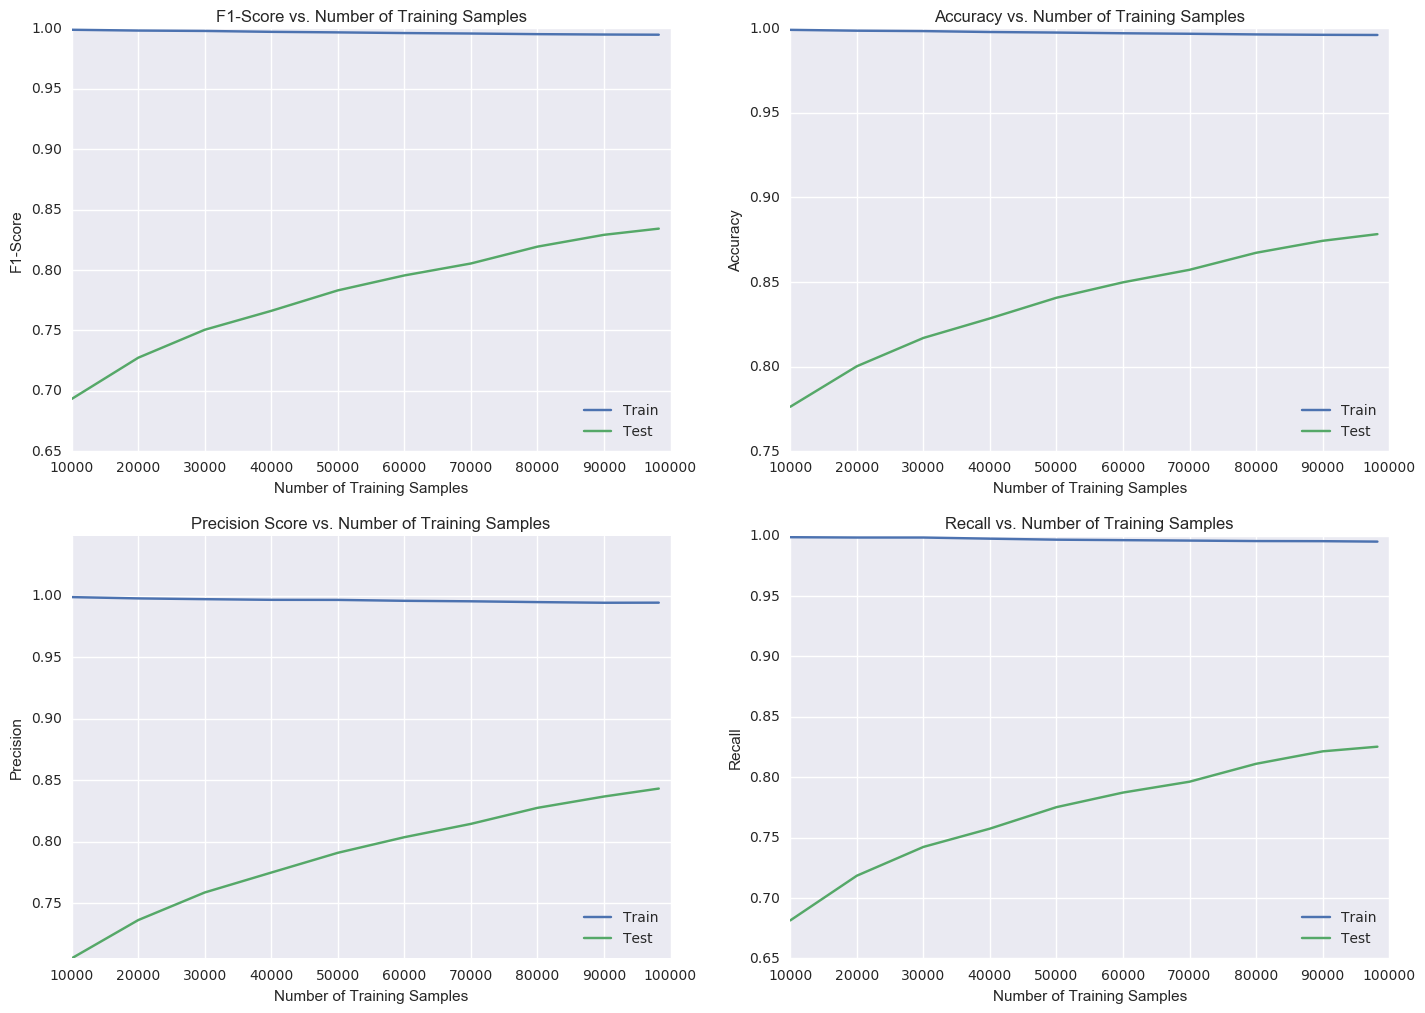

In [268]:
cv_rfc.plot_learning_curve()

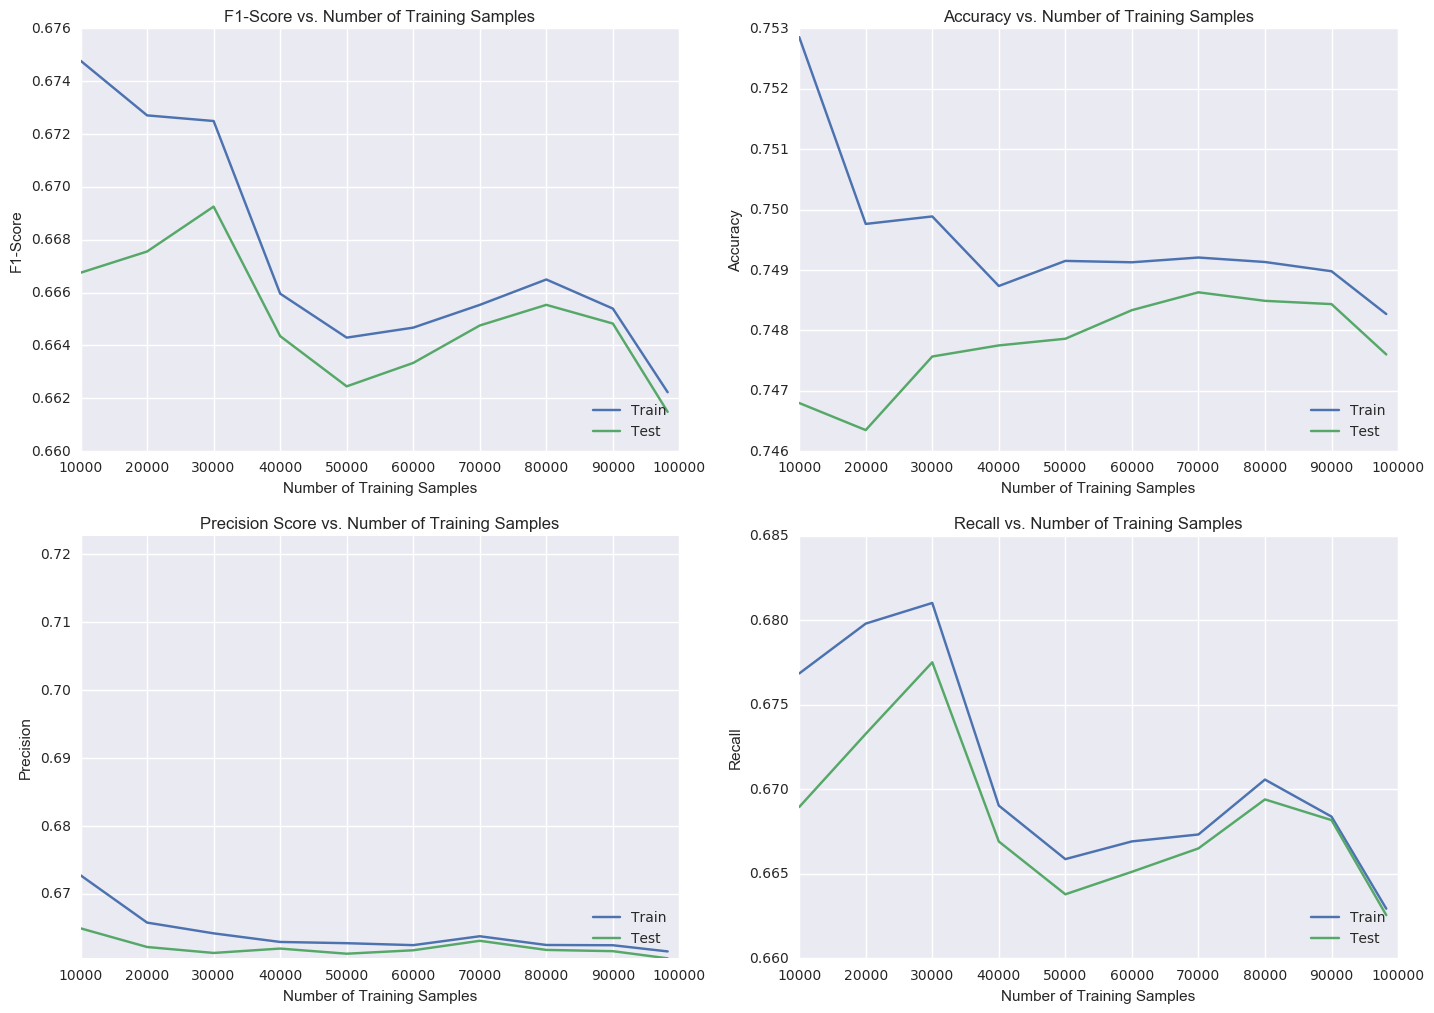

In [290]:
start = time()

lr = LogisticRegression(penalty='l2')
cvlog = cross_validation(lr, 
                      X_train.values, 
                      y_train.values,
                      n_splits=10,
                      init_chunk_size = 10000, 
                      chunk_spacings = 10000, 
                      average = "binary")

cvlog.train_for_learning_curve()
cvlog.plot_learning_curve()
end = time()
total_time_log = end - start

In [291]:
total_time_log

203.14117002487183

In [292]:
from sklearn.cluster import KMeans

In [293]:
kmean = KMeans()

In [294]:
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [296]:
kmean.transform(X)

array([[  4.12476587,   8.07892143,   5.5398517 , ...,   7.43258415,
          5.2599271 ,   9.23030531],
       [  3.98743994,   8.54482799,   6.09110893, ...,   6.0112725 ,
          6.5019543 ,   8.48825495],
       [  4.69993444,   9.55942424,   6.51861478, ...,   5.42826105,
          7.53809359,   8.98267831],
       ..., 
       [  6.59691268,   5.2742997 ,   8.16203573, ...,   9.60483405,
          6.17349889,   5.87817416],
       [  7.78696928,   2.80036334,   6.76934502, ...,  10.20043593,
          5.18604738,   6.45699603],
       [  8.19520658,   5.13927635,   7.54372627, ...,   8.47774419,
          7.75055032,   3.281304  ]])

In [301]:
clusters = kmean.predict(X)

(array([ 21839.,  19749.,  21740.,  16589.,   8143.,  13641.,  13162.,
          7929.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

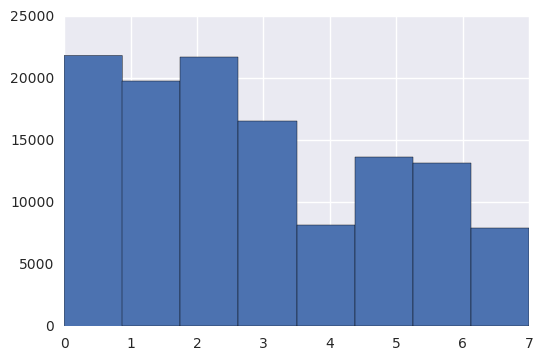

In [303]:
plt.hist(clusters, bins=8)